<a href="https://colab.research.google.com/github/ashwinidverma/AD-Classifier-/blob/main/OASIS_AD_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
##import shap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import lime
#from lime import lime_tabular
#shap.initjs()

In [14]:
# prompt: lode data.xlsx

import pandas as pd

# Load the data from the Excel file
df = pd.read_excel('/content/drive/MyDrive/Socital_403_2024/ML_Model/Final_Data/Oasis_Data.xlsx')

# Print the DataFrame
print(df.shape)


(586, 11)


In [15]:
df=df.dropna()
df

,ID,Sex,Hand,Age,Educ,SES,MMSE,Target,eTIV,nWBV,ASF
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344.00,0.743000,1.30600
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147.00,0.810000,1.53100
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,1.0,1454.00,0.708000,1.20700
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636.00,0.689000,1.07300
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321.00,0.827000,1.32900
...,...,...,...,...,...,...,...,...,...,...,...
579,OAS2_0179,M,R,79,20.0,1.0,26.0,1.0,1548.02,0.710546,1.13371
582,OAS2_0183,F,R,66,13.0,2.0,30.0,0.0,1495.24,0.746302,1.17373
583,OAS2_0184,F,R,72,16.0,3.0,24.0,1.0,1353.81,0.733098,1.29634
584,OAS2_0185,M,R,80,16.0,1.0,28.0,1.0,1703.59,0.710542,1.03018


In [16]:
# prompt: train a randomforest classifier usinf M/F,Hand,Age,Educ,SES,MMSE of df as feature and CDR as traget

from sklearn.ensemble import RandomForestClassifier
df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1})
#df['Target'] = df['Target'].replace({0: 0, 1: 1, 2 :1})

<ipython-input-16-c2025840cefc>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1})


In [19]:
df= df[['Sex',  'Age', 'Educ', 'MMSE','eTIV','nWBV','ASF','Target',]]

In [20]:
df=df.dropna()
print(df.shape)

(358, 8)


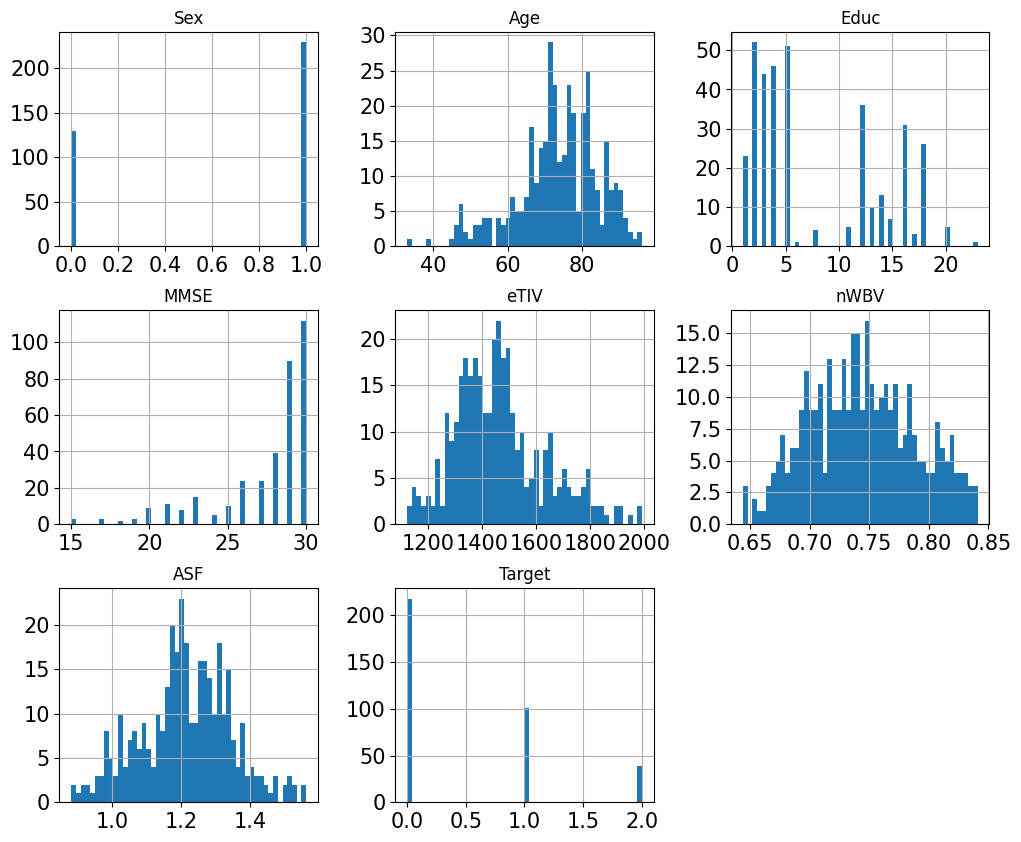

In [21]:
df[['Sex',  'Age', 'Educ',  'MMSE','eTIV','nWBV','ASF','Target',]].hist(figsize=(12, 10), bins=50, xlabelsize=15, ylabelsize=15)
plt.show()

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# # 1. Load and Preprocess Data
# # Using Iris dataset as an example

features = ['Sex',  'Age', 'Educ','eTIV','nWBV','ASF']
target = 'Target'

X = df[features]
y = df[target]
# # Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
cor = df[['Target','Sex',  'Age', 'Educ',  'MMSE','eTIV','nWBV','ASF']]

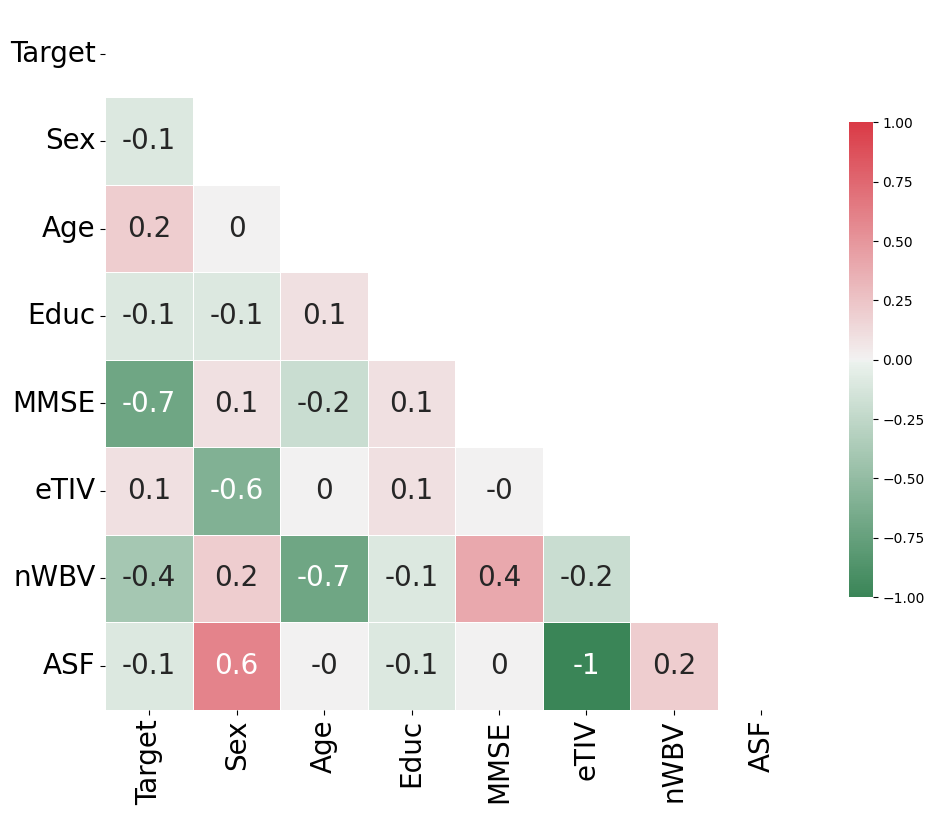

In [25]:
cor.corr()
f, ax = plt.subplots(figsize=(10,10))
corr=cor.corr().round(1)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidth = 0.5, cbar_kws={"shrink":0.5}, annot=True,annot_kws={"size": 20})
plt.yticks(fontsize=20, rotation=0)
plt.xticks(fontsize=20,rotation=90)
plt.tight_layout()

In [28]:

# 2. Train the Model
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100,max_depth =8,min_samples_split =10,random_state=42,)



# Fit the model on the training data
clf.fit(X_train, y_train)

# 3. Make Predictions
# Predict on the test data
y_pred = clf.predict(X_test)

# 4. Evaluate the Model
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 5. Feature Importances (Optional)
# Print feature importances
feature_importances = clf.feature_importances_


Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.92      0.72        37
         1.0       0.50      0.24      0.32        25
         2.0       0.33      0.10      0.15        10

    accuracy                           0.57        72
   macro avg       0.48      0.42      0.40        72
weighted avg       0.53      0.57      0.51        72

Confusion Matrix:
[[34  2  1]
 [18  6  1]
 [ 5  4  1]]
Accuracy: 0.5694444444444444


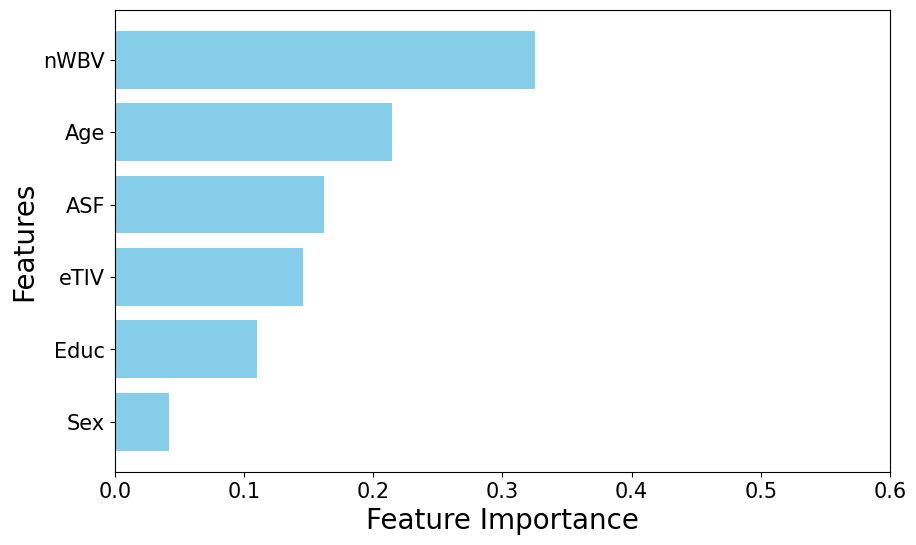

In [29]:
# Get feature importances and sort them
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]  # Sort in descending order

# Create a DataFrame for better visualization
sorted_features = pd.DataFrame({
    'Feature': np.array(X_train.columns)[sorted_indices],
    'Importance': importances[sorted_indices]
})

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features['Feature'], sorted_features['Importance'], color="skyblue")
plt.xlabel('Feature Importance',fontsize=20)
plt.ylabel('Features',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,0.6)
plt.gca().invert_yaxis()  # To have the highest importance at the top
plt.show()

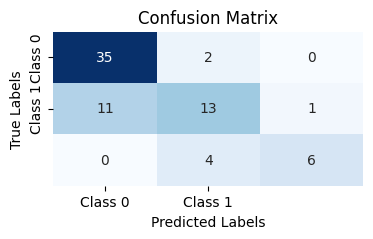

In [ ]:
plt.figure(figsize=(4, 2), facecolor='white')  # Ensure figure background is white
ax = plt.gca()
ax.set_facecolor('white')  # Set the axis background to white as well

# Plot heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
